<center><span style="color:green; font-size:200%;  font-weight: bold">Welcome to Avo World!!</span></center>

### ![Avocadoes](../../Downloads/avocadogif.gif)

### Questions: 
   * ####  Does the average price of avocados correlate with the total volume of avocados sold?
   * ####  How has the popularity of avocados (conventional & organic) changed over time? *** How many conventional avocados were sold vs organic avocados?
   * #### In which cities is it relatively expensive to buy organic avocados?
   * #### How have conventional avocado prices changed in the past few years?
   * #### How does the season affect the average price and the amount of avocados sold in the US? (Not Answered)
    

### Dataset Features (Columns):
   * #### Date - The date of observation 
   * #### Average Price - The average price of one avocado
   * #### Total Volume - Total number of avocados sold
   * #### 4046 - Total number of avocados with PLU 4046 sold 
   * #### 4225 - Total number of avocados with PLU 4225 sold 
   * #### 4770 - Total number of avocados with PLU 4770 sold
   * #### Year - Between 2015-2018
   * #### Region - The region or city of the data observation
   * #### Type - conventional or organic avocados

### Resource: [KaggleAvocadoToast](https://www.kaggle.com/neuromusic/avocado-prices)

### Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import norm

### Avocado Dataset and Cleaning Dataset


In [4]:
avocados_df = pd.read_csv('../../DS1/datasets/avocado.csv')
avocados_df['Date'] = pd.to_datetime(avocados_df['Date'])
avocados_df['Month'] = avocados_df['Date'].dt.month
avocados_df.rename(columns={'type':'Type', 'year':'Year', 'region':'Region', 'Total Volume':'TotalVolume', 'Total Bags':'TotalBags', 'Small Bags':'SmallBags', 'Large Bags':'LargeBags', 'XLarge Bags': 'XLargeBags'},inplace=True)


In [5]:
avocados_df.head()

,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region,Month
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [6]:
### Convert these value from floats to integers 

In [7]:
avocados_df['TotalVolume']=avocados_df['TotalVolume'].astype(int)
avocados_df['4046']=avocados_df['4046'].astype(int)
avocados_df['4225']=avocados_df['4225'].astype(int)
avocados_df['4770']=avocados_df['4770'].astype(int)
avocados_df['TotalBags']=avocados_df['TotalBags'].astype(int)
avocados_df['SmallBags']=avocados_df['SmallBags'].astype(int)
avocados_df['LargeBags']=avocados_df['LargeBags'].astype(int)
avocados_df['XLargeBags']=avocados_df['XLargeBags'].astype(int)

In [8]:
avocados_df.head(1)
avocados_df.describe()

,Unnamed: 0,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,Year,Month
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,24.232232,1.405978,8.506435e+05,2.930079e+05,2.951541e+05,2.283940e+04,2.396387e+05,1.821942e+05,5.433767e+04,3106.279029,2016.147899,6.177215
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074640e+05,9.862424e+05,7.461785e+05,2.439659e+05,17692.837485,0.939938,3.534130
min,0.000000,0.440000,8.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,10.000000,1.100000,1.083800e+04,8.540000e+02,3.008000e+03,0.000000e+00,5.088000e+03,2.849000e+03,1.270000e+02,0.000000,2015.000000,3.000000
50%,24.000000,1.370000,1.073760e+05,8.645000e+03,2.906100e+04,1.840000e+02,3.974300e+04,2.636200e+04,2.647000e+03,0.000000,2016.000000,6.000000
75%,38.000000,1.660000,4.329620e+05,1.110200e+05,1.502060e+05,6.243000e+03,1.107830e+05,8.333700e+04,2.202900e+04,132.000000,2017.000000,9.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719096e+06,551693.000000,2018.000000,12.000000


In [9]:
### Helper Functions 

(Write Markdown that has APPEND class that links to this part of the page.) (Give it specific class name to refer to later.)

In [10]:
def _drop_redundant_columns(dataset, col_name=None):
    """ Helper function with KWA to remove redundant/unnecessary columns. """
    if col_name is not None:
        if col_name in dataset.columns:
            dataset.drop(columns=[col_name], inplace=True)
            return dataset.head()
        else:
            raise NameError("\nColumn name not found in dataset.\n")
    else:
        print("\nNo column name given.\n")

In [11]:
_drop_redundant_columns(avocados_df, "Unnamed: 0")

,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region,Month
0,2015-12-27,1.33,64236,1036,54454,48,8696,8603,93,0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876,674,44638,58,9505,9408,97,0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220,794,109149,130,8145,8042,103,0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992,1132,71976,72,5811,5677,133,0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039,941,43838,75,6183,5986,197,0,conventional,2015,Albany,11


### Q1: Does the average price of avocados correlate with the total volume of avocados sold?

#### I guessing that average price correlates with total volume.

#### Woah!! I thought the average price determined how much avocado would be sold. 

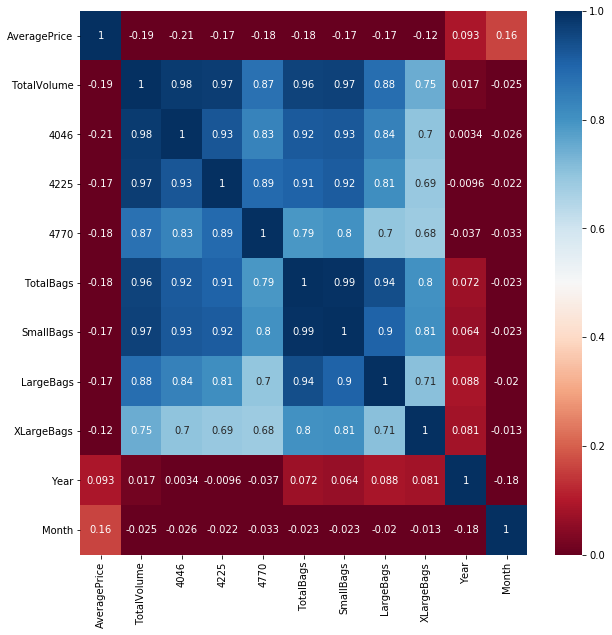

In [12]:
avocado_corr_data = avocados_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(avocado_corr_data,annot=True, cmap="RdBu", vmin=0.0, vmax=1.0)

### Q2: How has the popularity of avocados (conventional & organic) changed over time? *** How many conventional avocados were sold vs organic avocados? 

In [13]:
# X = [1,2,3,4,5,6,7,8,9,10,11,12]
# conventional_data = avo_2015[avo_2015["Type"] == "conventional"]
# organic_data = avo_2015[avo_2015["Type"] == "organic"]
# _X = np.arange(len(X))

# conventional_months = conventional_data.groupby(["Month"]).sum()
# organic_months = organic_data.groupby(["Month"]).sum()

# plt.bar(_X - 0.2, conventional_months['TotalVolume'], 0.4)
# plt.bar(_X - 0.2, organic_months['TotalVolume'], 0.4)
# plt.xticks(_X, conventional_months)
# plt.figure(figsize=(20,20))
# plt.show()

# conventional = (avocados_df['Region'].isin(['SanFrancisco']) & (avocados_df['Type']=='conventional'))
# tech_world = sns.factorplot('Month', 'AveragePrice', data=avocados_df[sf], hue='Year',row='Region',aspect=2, palette='Greens')

### Q3: In which cities is it relatively expensive to buy organic avocados?

/Users/uchenna/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/uchenna/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


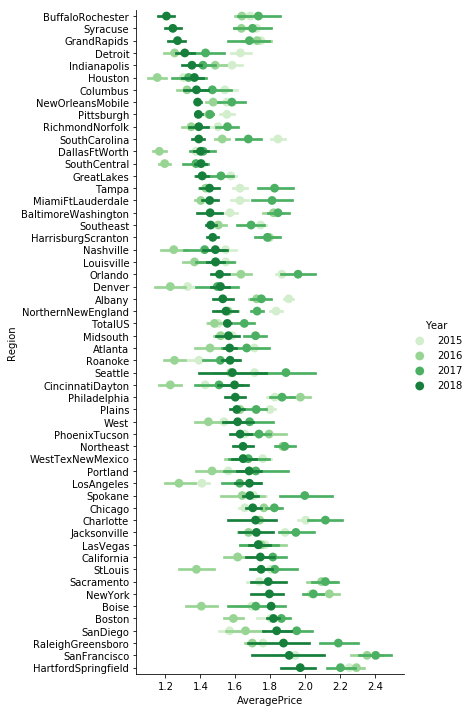

In [14]:
organic_avocados = avocados_df[avocados_df['Type']=='organic']
order = (
    avocados_df[(avocados_df['Year']==2018) & (avocados_df['Type']=='organic')]
    .groupby('Region')['AveragePrice']
    .mean()
    .sort_values()
    .index
)
sns.factorplot(x='AveragePrice',y='Region', data=organic_avocados, hue='Year',size=10,aspect=0.6,palette='Greens',join=False,order=order)


### Note: Regions like HartfordSpringField and San Francisco have the most expensive organic avacodos, while Buffalo, Rochester and Syracuse (cities in New York) has the cheapest organic avocados.

### Top 5 cities where organic avocados are really expensive in 2018


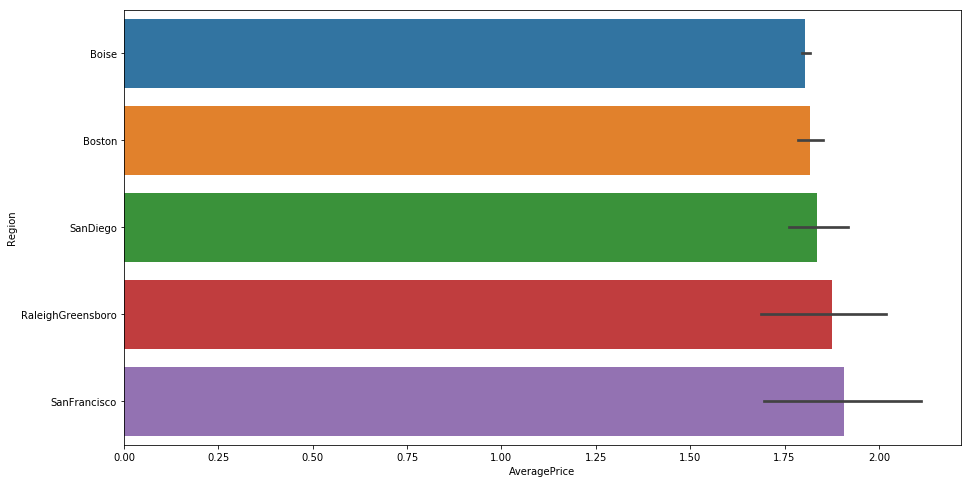

In [15]:
order = (
    avocados_df[(avocados_df['Year']==2018) & (avocados_df['Type']=='organic')]
    .groupby('Region')['AveragePrice']
    .mean()
    .sort_values()
    .index
)

expensive_avo_city = avocados_df[(avocados_df['Type']=='organic') & (avocados_df['Year']==2018)].sort_values(by='AveragePrice', ascending=True)
plt.figure(figsize=(15,8))
# ax=sns.factorplot(x='AveragePrice',y='Region', data=expensive_avo_city, hue='Year',size=10,aspect=0.6,palette='Greens',join=False, order=order[-6:-1])
sns.barplot(x = expensive_avo_city['AveragePrice'], y=expensive_avo_city['Region'], order=order[-6:-1])


### Top 5 cities where organic avocados are inexpensive in 2018

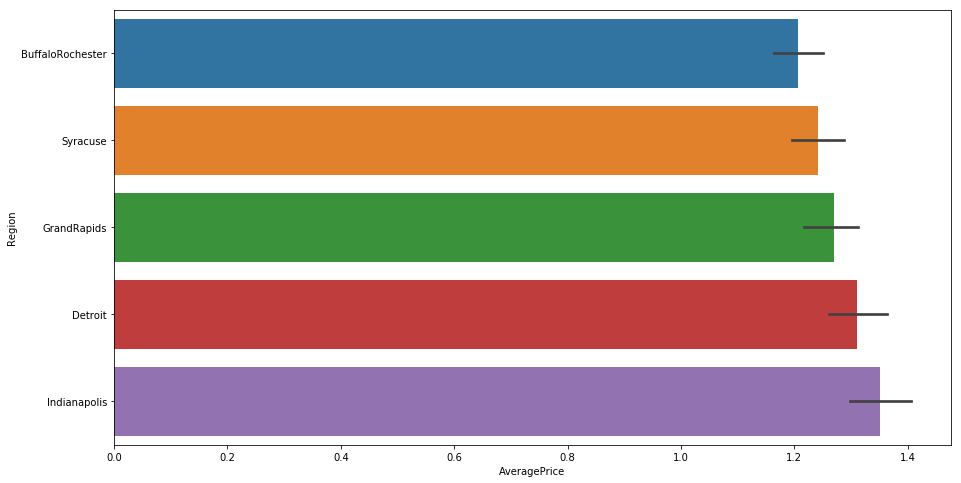

In [16]:
order = (
    avocados_df[(avocados_df['Year']==2018) & (avocados_df['Type']=='organic')]
    .groupby('Region')['AveragePrice']
    .mean()
    .sort_values()
    .index
)
expensive_avo_city = avocados_df[(avocados_df['Type']=='organic') & (avocados_df['Year']==2018)].sort_values(by='AveragePrice', ascending=True)
plt.figure(figsize=(15,8))
# sns.factorplot(x='AveragePrice',y='Region', data=expensive_avo_city, hue='Year',size=8,aspect=0.8,palette='Greens',join=False, order=order[0:5])
sns.barplot(x = expensive_avo_city['AveragePrice'], y=expensive_avo_city['Region'], order=order[0:5])

### Q4: How have conventional avocado prices changed in the past few years? 

* ####  Let's take a look at San Francisco, Nashville, and Houston 

/Users/uchenna/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/uchenna/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/uchenna/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip

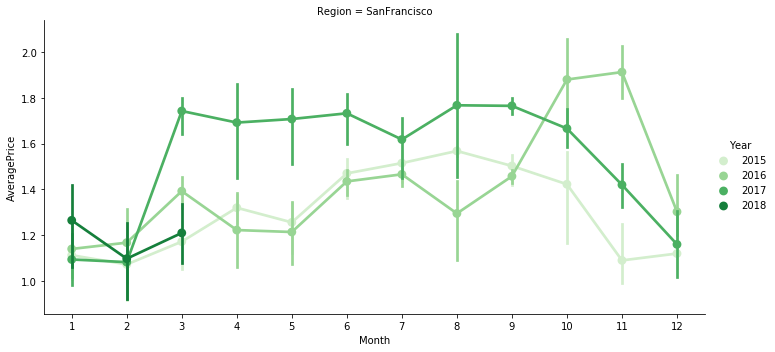

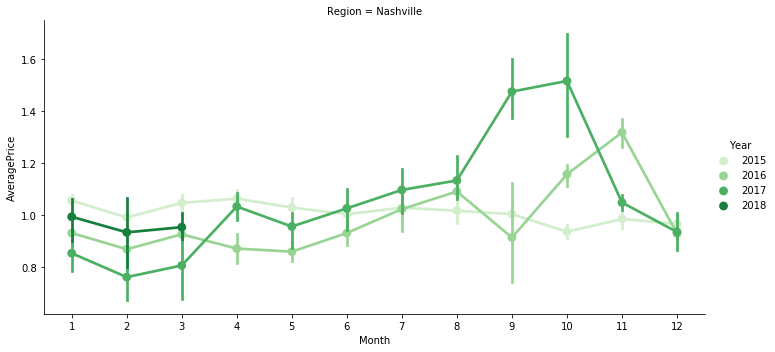

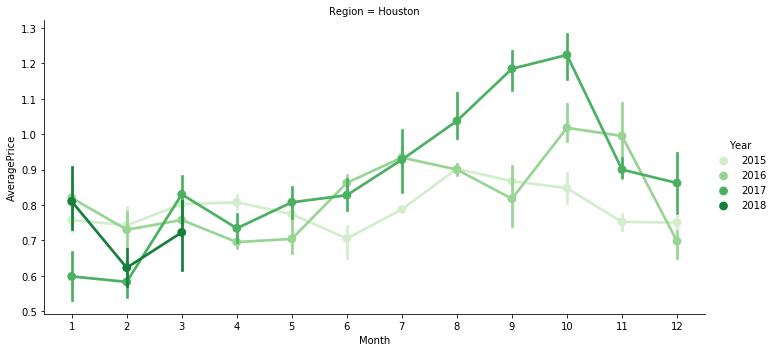

In [17]:
# regions = SanFrancisco
sf = (avocados_df['Region'].isin(['SanFrancisco']) & (avocados_df['Type']=='conventional'))
tech_world = sns.factorplot('Month', 'AveragePrice', data=avocados_df[sf], hue='Year',row='Region',aspect=2, palette='Greens')

# Nashville, Tennessee 
n = (avocados_df['Region'].isin(['Nashville']) & (avocados_df['Type']=='conventional'))
music_city = sns.factorplot('Month', 'AveragePrice', data=avocados_df[n], hue='Year',row='Region',aspect=2, palette='Greens')


# Houston, Texas 
h = (avocados_df['Region'].isin(['Houston']) & (avocados_df['Type']=='conventional'))
cow_boys = sns.factorplot('Month', 'AveragePrice', data=avocados_df[h], hue='Year',row='Region',aspect=2, palette='Greens')



# Findings: 
- Between May and June, prices start to increase 
- Prices peak around between September and October 

   - San Francisco (\$1.60)
   - Nasvhille (\$1.50)
   - Houston (\$1.20)
* Average price completely drops after October 

## Conclusion:
* #### Average prices change based on the month and city in which conventional and organic avocados are sold in.  
* #### Total volume of avocados sold doesn't correspond with the average price. 
* #### Buying avocado toast in San Francisco is too $$$. Make your toast at home. 

### ![Avocadoes](../../Downloads/avocadotoast.jpg)

### Is the total volume of avocados sold affected by the different type of avocadoes by their PLU (4046, 4225, 4770)?

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf 
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split
from sklearn import svm
avocados_df.head(1)

### Features 

- Avocados with PLU such as 4046, 4225, 4770
- Total Bags sold 

### Target (Label) 

Total Volume of avocadoes. Apparently average price of avocadoes has a low correlation with other features. 

In [19]:
features_cols = ['4046','4225','4770', 'TotalBags']
X = avocados_df[features_cols]
Y = avocados_df.TotalVolume

lg = LinearRegression()
lg.fit(X, Y)

lg.predict(X=X)

## Find R2 to detemine how accurate this model is 
score = lg.score(X, Y)
score = r2_score(Y, lg.predict(X))
print(score)

0.9999999997956807


In [ ]:
clf_p = svm.SVR(kernel='linear')
clf_p.fit(X, Y)
clf_p.predit(X)
clf_p.score()


X_train, X_test, y_train, y_test = train_test_split(boston_df[cols], boston_df_target, test_size = .2)

In [ ]:
from scipy.stats import boxcox
sns.distplot(boston_df_target)
show()

<center><span style='font-size:200%;  font-weight: bold'>Any Questions?</span></center>

### ![Avocadoes](../../Downloads/avocadodancing.gif)